# **Clasificación 1**

**Paso 1: Graficar la Distribución de Clases**

Primero, graficamos la distribución de clases para ver si el dataset está balanceado.

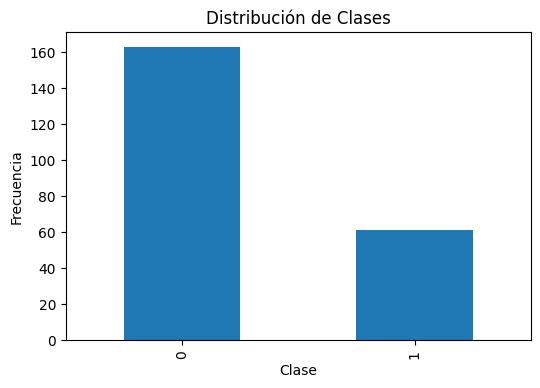

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'heart_faliure_limpio.csv'
data = pd.read_csv(file_path)

# Graficar la distribución de clases
class_counts = data['DEATH_EVENT'].value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


**Paso 2: Partición del Dataset en Conjunto de Entrenamiento y Test**

Realizamos la partición del dataset en conjuntos de entrenamiento y test de forma estratificada.

In [2]:
from sklearn.model_selection import train_test_split

# Preparar los datos
X = data.drop(columns=['DEATH_EVENT', 'age category'])
y = data['DEATH_EVENT']

# Partición del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**Paso 3: Ajuste de un Árbol de Decisión**

Ajustamos un modelo de árbol de decisión y calculamos la precisión en el conjunto de test.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear y ajustar el modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.78


**Paso 4: Optimización del Modelo**

Probamos diferentes valores de hiperparámetros para tratar de mejorar la precisión.

In [4]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Realizar la búsqueda en grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de test con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Calcular la precisión
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Mejor Accuracy: {best_accuracy:.2f}')
print(f'Mejores Parámetros: {grid_search.best_params_}')


Mejor Accuracy: 0.82
Mejores Parámetros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
